In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify the path to your JSON file
file_path = '/home/newuser/Downloads/robustness_exp/q3_result.json'
sweep_file = '/home/newuser/Downloads/robustness_exp/tpch_q3_sweep.csv'
# Open and load the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

table = pd.read_csv(sweep_file,index_col=0)



In [3]:
# Step 1: Create sorted value arrays for col1 and col2
col1_name = list(data.keys())[0]  # col1name
col2_name = list(data.keys())[1]  # col2name

# Get selectivity dictionaries for col1 and col2
col1_values = data[col1_name]
col2_values = data[col2_name]


In [4]:
deviation_log = data['deviation_log']




[(0, 85, 23.357107197620042), (1, 85, 27.533461842180397), (2, 88, 12.087392177219813), (3, 89, 12.53511073315483), (4, 89, 12.454362142630305), (5, 89, 12.466912801194908), (6, 91, 10.731851872847628), (7, 91, 11.350455816797936), (8, 94, 11.662140838541186), (9, 94, 11.770502226954404), (10, 94, 11.715406453461835), (11, 95, 11.47566788077012), (12, 97, 11.227273136383712), (13, 99, 11.209106063140808), (14, 100, 11.635829926121469), (15, 100, 11.674690996790279), (16, 100, 11.654024534881678), (17, 101, 10.098316568395756), (18, 104, 10.77072836864751), (19, 104, 10.961534521764351), (20, 106, 11.227628726087417), (21, 106, 11.270884291696053), (22, 106, 10.764068394825713), (23, 107, 11.095049215333548), (24, 110, 10.496529368239322), (25, 110, 10.48981484198481), (26, 110, 10.59860299088032), (27, 113, 10.583605341890888), (28, 114, 10.894634841719594), (29, 114, 11.006016281450112), (30, 114, 10.906874091459956), (31, 115, 10.147770618215622), (32, 118, 10.021937397168458), (33, 

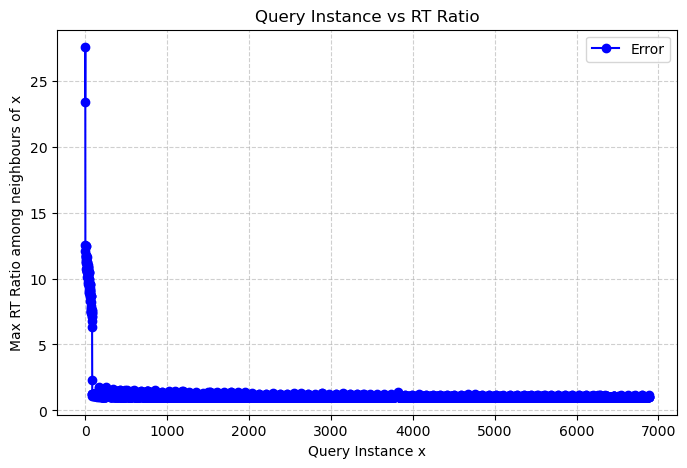

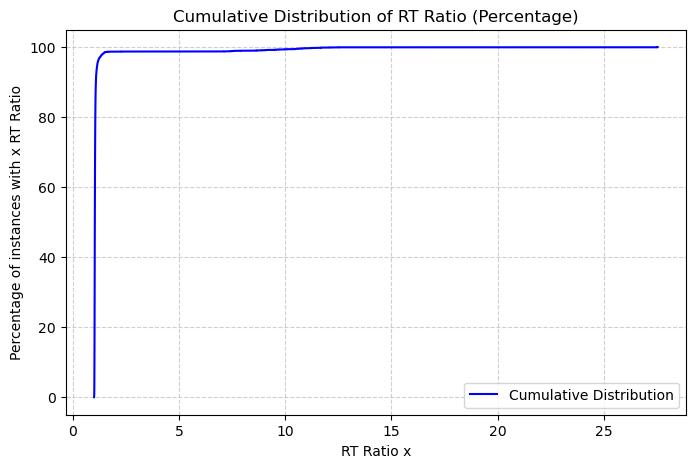

In [7]:
from collections import defaultdict
result = defaultdict(lambda: (None, float('-inf')))

# Iterate through the data to calculate maxidx and max_error
for idx1, idx2, error in deviation_log:
    current_maxidx, current_max_error = result[idx1]
    if error > current_max_error:
        result[idx1] = (idx2, error)

# Convert to a list of tuples if needed
result_list = [(idx, maxidx, max_error) for idx, (maxidx, max_error) in result.items()]

# Print the result
print(result_list)

# Extract idx and max_error for plotting
idx_values = [entry[0] for entry in result_list]
max_errors = [entry[2] for entry in result_list]

# Create the 2D plot
plt.figure(figsize=(8, 5))
plt.plot(idx_values, max_errors, marker='o', linestyle='-', color='b', label='Error')
plt.xlabel('Query Instance x')
plt.ylabel('Max RT Ratio among neighbours of x')
plt.title('Query Instance vs RT Ratio')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Extract the errors
errors = [entry[2] for entry in result_list]

# Sort errors to compute cumulative count
sorted_errors = np.sort(errors)
cumulative_count = np.arange(1, len(sorted_errors) + 1)

# Convert cumulative count to percentage
cumulative_percentage = (cumulative_count / len(sorted_errors)) * 100

# Create the plot
plt.figure(figsize=(8, 5))
plt.step(sorted_errors, cumulative_percentage, where="post", color="b", label="Cumulative Distribution")
plt.xlabel("RT Ratio x")
plt.ylabel("Percentage of instances with x RT Ratio")
plt.title("Cumulative Distribution of RT Ratio (Percentage)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

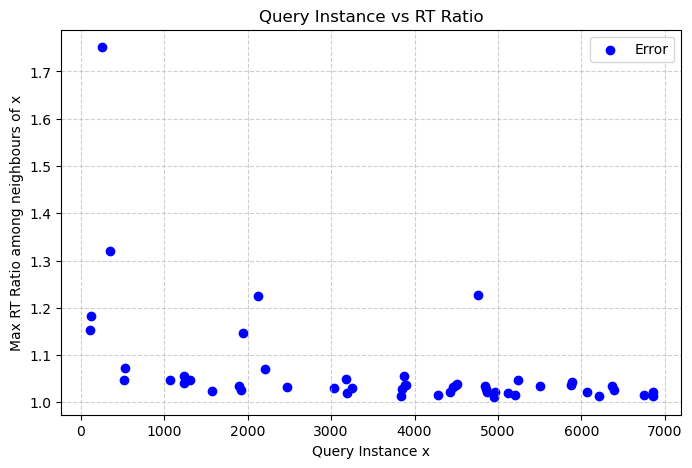

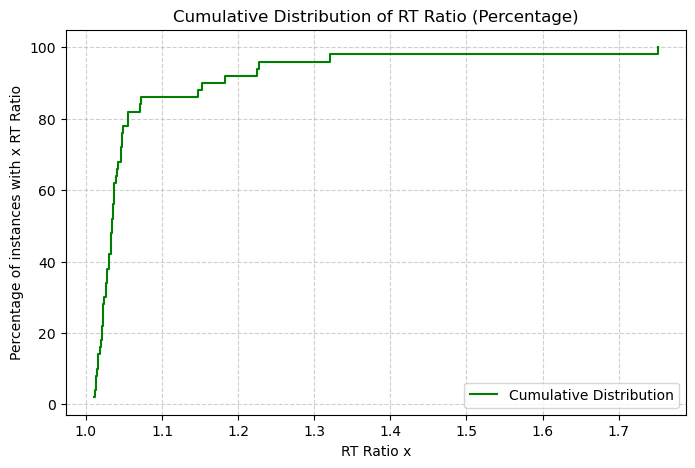

In [8]:
import random

# Randomly select 50 indices from the result list (if you have less than 50, it will select all of them)
random_indices = random.sample(result_list, min(50, len(result_list)))
random.seed(3) 
# Extract idx and errors
idx_values = [entry[0] for entry in random_indices]
errors = [entry[2] for entry in random_indices]

# 1. First 2D plot: idx vs error
plt.figure(figsize=(8, 5))
plt.scatter(idx_values, errors, marker='o', linestyle='-', color='b', label='Error')
plt.xlabel('Query Instance x')
plt.ylabel('Max RT Ratio among neighbours of x')
plt.title('Query Instance vs RT Ratio')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# 2. Second 2D plot: Cumulative distribution of errors
# Sort the errors to compute cumulative percentage
sorted_errors = np.sort(errors)
cumulative_count = np.arange(1, len(sorted_errors) + 1)

# Convert cumulative count to percentage
cumulative_percentage = (cumulative_count / len(sorted_errors)) * 100

plt.figure(figsize=(8, 5))
plt.step(sorted_errors, cumulative_percentage, where="post", color="g", label="Cumulative Distribution")
plt.xlabel("RT Ratio x")
plt.ylabel("Percentage of instances with x RT Ratio")
plt.title("Cumulative Distribution of RT Ratio (Percentage)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()